# Explore here

##Banking Marketing Campaign

In [ ]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


#pd.set_option('display.max_colums',None)



In [3]:
main_df=pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=413&path=bank-marketing-campaign-data.csv",sep=';')

In [4]:
main_df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

<Axes: xlabel='age'>

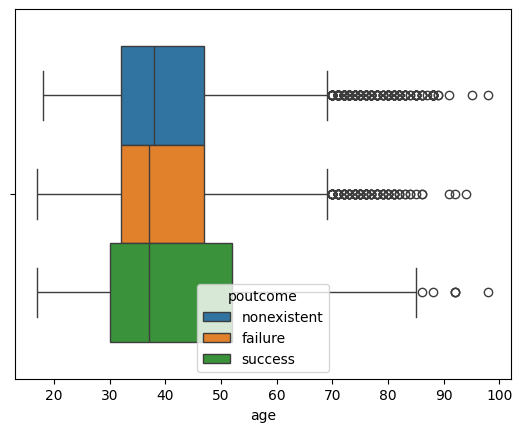

In [ ]:
#main_df.info()
#main_df.head()
#main_df[main_df['y']=='yes'].describe()

sns.boxplot(data = main_df, x='age', hue = 'poutcome')

#main_df.groupby('previous')['poutcome'].value_counts(normalize=True)
#customers contavcted 2 to 4 timw previous 40 percent sucess

In [66]:
#how many people are yes or no in this data set
#plt.figure(figsize=(6,3))
#sns.histplot(data = main_df[main_df['poutcome']!='nonexistent'], x='age', hue = 'poutcome', 
             #stat='probability', common_norm = False)

In [38]:
#main_df.groupby('education').value_counts()
#education degree has higher rate
#main_df['nr.employed'].describe()

#plt.scatter(data= main_df,y = 'age', x ='nr.employed')
#sns.boxplot(data = main_df, x='nr.employed', hue = 'poutcome')
#fit and transdorm code
categorical_columns = main_df.select_dtypes(include=['object']).columns.tolist()
for i in categorical_columns: 
    print(main_df[i].value_counts())
drop_col = ['month','day_of_week','poutcome','contact']
drop_df= main_df.drop(columns=drop_col, inplace=False)
categorical_columns = drop_df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(drop_df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([drop_df, one_hot_df], axis=1)
df_encoded.drop(columns=categorical_columns, inplace=True)


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
contact
cellular     26144
telephone    15044
Name: count, dtype: in

                                    age  duration  campaign     pdays  \
age                            1.000000 -0.000866  0.004594 -0.034369   
duration                      -0.000866  1.000000 -0.071699 -0.047577   
campaign                       0.004594 -0.071699  1.000000  0.052584   
pdays                         -0.034369 -0.047577  0.052584  1.000000   
previous                       0.024365  0.020640 -0.079141 -0.587514   
emp.var.rate                  -0.000371 -0.027968  0.150754  0.271004   
cons.price.idx                 0.000857  0.005312  0.127836  0.078889   
cons.conf.idx                  0.129372 -0.008173 -0.013733 -0.091342   
euribor3m                      0.010767 -0.032897  0.135133  0.296899   
nr.employed                   -0.017725 -0.044703  0.144095  0.372605   
job_admin.                    -0.102584 -0.008918  0.011745 -0.025398   
job_blue-collar               -0.024191  0.012992 -0.001775  0.065335   
job_entrepreneur               0.031213  0.003679 -

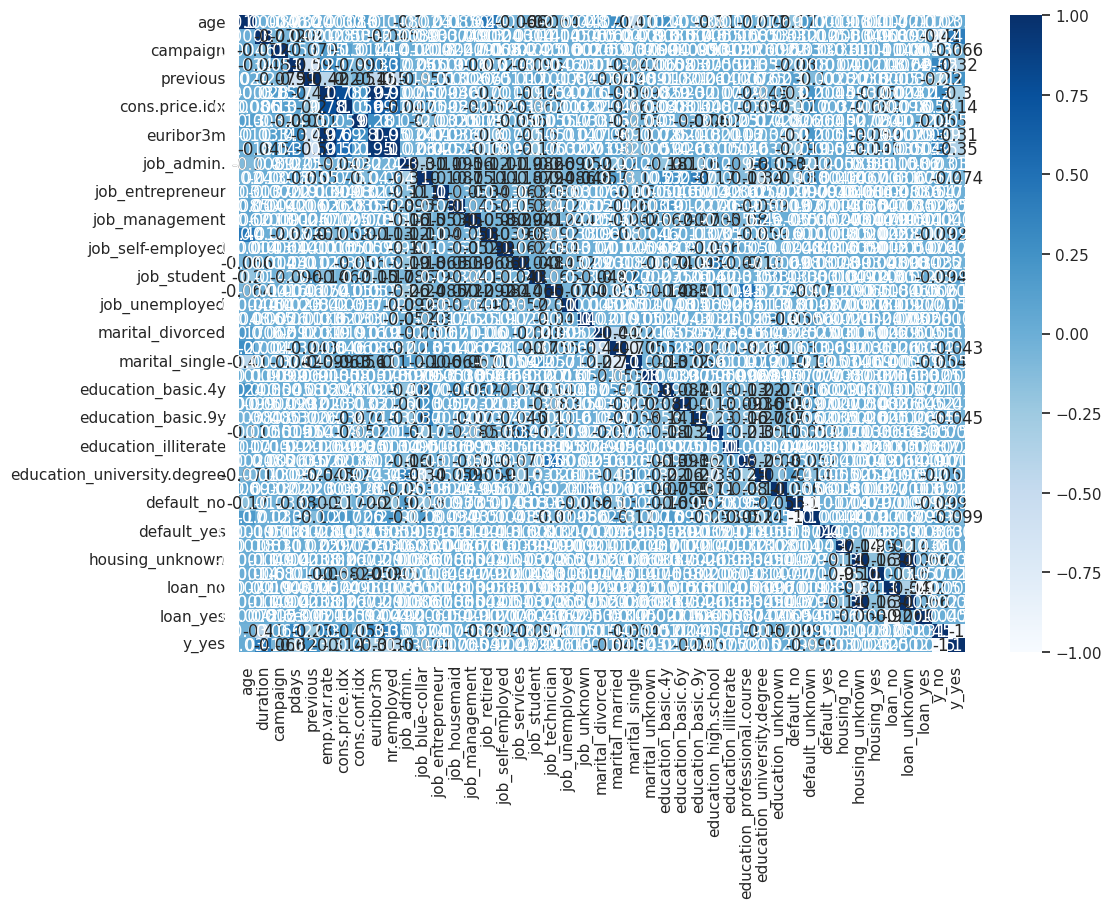

In [ ]:
corr = df_encoded.corr()
sns.set_theme(rc={"figure.figsize":(11.7,8.27)})
sns.heatmap(data=corr, cmap="Blues",annot=True)
print(corr)
#above -+.2 keep

In [30]:
df_encoded.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [50]:
#testing to predict y
include_these_featured = ['age','job','housing','loan','duration','campaign','nr.employed','cons.price.idx','emp.var.rate']





In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X= main_df[include_these_featured]
y= main_df['y']


In [54]:
pd.get_dummies(X, drop_first=True)

,age,duration,campaign,nr.employed,cons.price.idx,emp.var.rate,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,261,1,5191.0,93.994,1.1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,1,5191.0,93.994,1.1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,37,226,1,5191.0,93.994,1.1,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,40,151,1,5191.0,93.994,1.1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,307,1,5191.0,93.994,1.1,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,4963.6,94.767,-1.1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
41184,46,383,1,4963.6,94.767,-1.1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,56,189,2,4963.6,94.767,-1.1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
41186,44,442,1,4963.6,94.767,-1.1,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [64]:
from sklearn.model_selection import train_test_split


In [65]:

X_train, X_test, y_train, y_test = train_test_split(x_dummies,y)



NameError: name 'x_dummies' is not defined

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

NameError: name 'LinearRegression' is not defined

In [ ]:
train_preds[train_predic]

In [ ]:
#evaluation method

In [ ]:
from sklearn.metrics import 